# <span style="color:#F72585"> Subclassing-Modelo de Regresión multi-logística</span>


## <span style="color:#4361EE">Introducción</span>

Esta lección está dedicada a presentar la programación orientada a objetos aplicada a Keras, conocida genéricamente coo subclassing.

El tema es recomendado para  usuarios con conocimientos en programación y keras en nuestro caso.

Haremos el  modelo  de clasificación con múltiples categorías, utilizado en la introducción de la API funcional. El ejemplo es de nuevo Iris, con el propósito de comparar los dos estilos de programación.


## <span style="color:#4361EE">Importa módulos</span>


In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Input, Activation
#
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
print(tf.__version__)

2.8.0


## <span style="color:#4361EE">El conjunto de datos Iris</span>

Este conjunto de datos fue introducido por sir [Ronald Fisher](https://es.wikipedia.org/wiki/Ronald_Fisher)

## <span style="color:#4361EE">Lectura de datos</span>


In [3]:
# nombres de las columnas de los datos
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
target_dimensions = ['Setosa', 'Versicolor', 'Virginica']

# lee los datos
training_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

training = pd.read_csv(training_data_path, names=col_names, header=0)
test = pd.read_csv(test_data_path, names=col_names, header=0)

16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0s/step


## <span style="color:#4361EE">Pre-procesamiento</span>


La variable objetivo (target) tiene tres categorías. Usaremos la codificación one-hot.

### <span style="color:#4CC9F0">Codificación one-hot</span>

In [4]:
y_train= pd.DataFrame(to_categorical(training.Species))
y_train.columns = target_dimensions

y_test = pd.DataFrame(to_categorical(test.Species))
y_test.columns = target_dimensions

### <span style="color:#4CC9F0">Elimina columna Species </span>


In [5]:
training.drop(['Species'], axis=1, inplace=True)
#test.drop(['Species'], axis=1, inplace=True)
y_test_species = test.pop('Species') # extrae la columna y la coloca en y_test_species
#
#Si necesita subir al dataframe la recodificación use estas líneas
#training = training.join(labels_training )
#test = test.join(labels_test )


### <span style="color:#4CC9F0">Normaliza los features</span>


#### <span style="color:#4CC9F0">StandardScaler</span>


In [6]:
# crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta los parámetros del scaler
scaler.fit(training)
print (scaler.mean_)

# escala training y test
x_train = scaler.transform(training)
x_test = scaler.transform(test)

# labels ( no requieren escalación)


[5.845      3.065      3.73916667 1.19666667]



## <span style="color:#4361EE">Crea el modelo usando subclassing</span>


 Vamos a derivar una clase de la clase Model

In [7]:
class CustomModel(Model):
    
    def __init__(self, **kwargs):
        super(CustomModel, self).__init__(**kwargs)
        self.dense1 = Dense(5, activation='relu', )
        self.dense2 = Dense(10, activation='relu')
        self.dense3 = Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)
    


## <span style="color:#4361EE">Crea una instancia de CustomModel</span>

In [8]:
model_iris = CustomModel(name='my_custom_model')

## <span style="color:#4361EE">Compila</span>


In [9]:
model_iris.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## <span style="color:#4361EE">Entrena</span>


In [10]:

history = model_iris.fit(x_train, y_train.values,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2)

Epoch 1/30
2/2 [==============================] - 2s 336ms/step - loss: 1.4744 - accuracy: 0.2500 - val_loss: 1.2593 - val_accuracy: 0.2083
Epoch 2/30
2/2 [==============================] - 0s 52ms/step - loss: 1.4243 - accuracy: 0.2396 - val_loss: 1.2419 - val_accuracy: 0.2083
Epoch 3/30
2/2 [==============================] - 0s 50ms/step - loss: 1.3924 - accuracy: 0.2396 - val_loss: 1.2297 - val_accuracy: 0.2083
Epoch 4/30
2/2 [==============================] - 0s 42ms/step - loss: 1.3694 - accuracy: 0.2396 - val_loss: 1.2179 - val_accuracy: 0.2083
Epoch 5/30
2/2 [==============================] - 0s 40ms/step - loss: 1.3482 - accuracy: 0.2396 - val_loss: 1.2079 - val_accuracy: 0.2083
Epoch 6/30
2/2 [==============================] - 0s 40ms/step - loss: 1.3273 - accuracy: 0.2396 - val_loss: 1.1990 - val_accuracy: 0.2083
Epoch 7/30
2/2 [==============================] - 0s 40ms/step - loss: 1.3106 - accuracy: 0.2396 - val_loss: 1.1907 - val_accuracy: 0.2083
Epoch 8/30
2/2 [==========

In [11]:
model_iris.summary()
#plot_model(model_iris, to_file='../Imagenes/iris_model.png', 
#           show_shapes=True)

Model: "my_custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  25        
                                                                 
 dense_1 (Dense)             multiple                  60        
                                                                 
 dense_2 (Dense)             multiple                  33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## <span style="color:#4361EE">Evaluación del modelo</span>


In [12]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

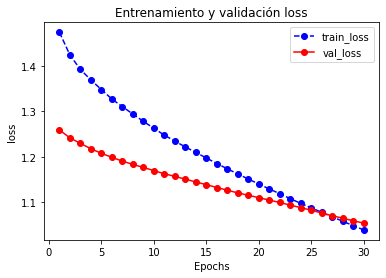

In [13]:
plot_metric(history, 'loss')

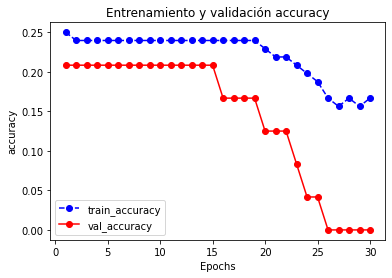

In [14]:
plot_metric(history, 'accuracy')

In [15]:
model_iris.evaluate(x = x_test,y = y_test.values)

1/1 [==============================] - 0s 41ms/step - loss: 1.0492 - accuracy: 0.1333


[1.0492312908172607, 0.13333334028720856]

## <span style="color:#4361EE">Predicciones</span>


In [16]:
# Predicting the Test set results
y_pred = model_iris.predict(x_test)
y_pred_c = np.argmax(y_pred, axis=1)

## <span style="color:#4361EE">Matriz de confusión</span>


In [17]:
cm = confusion_matrix(y_test_species, y_pred_c)

In [18]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1]+ cm[2][2])/y_test_species.shape[0])*100))

Our accuracy is 13.333333333333334%


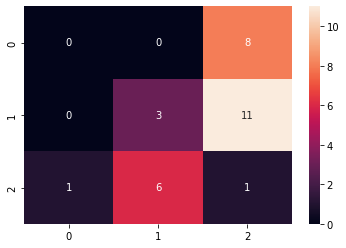

In [19]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')